In [1]:
import gymnasium as gym
import pathfinders
from agents.agent import SarsaAgent
import numpy as np
import matplotlib.pyplot as plt 

c:\Users\mb-92\anaconda3\envs\RLgym\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.graphics to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.graphics` for environment variables or `env.get_wrapper_attr('graphics')` that will search the reminding wrappers.
  logger.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


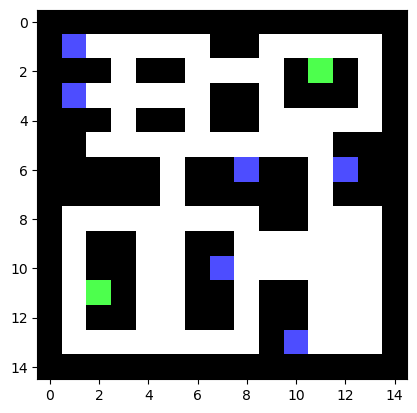

In [2]:
env = gym.make('city-v0', render_mode = "rgb_array")
plt.imshow(env.graphics)

In [3]:
env = gym.make('shortcutmaze-v0', render_mode = "rgb_array")


In [4]:
env.graphics[21,5:7,:]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


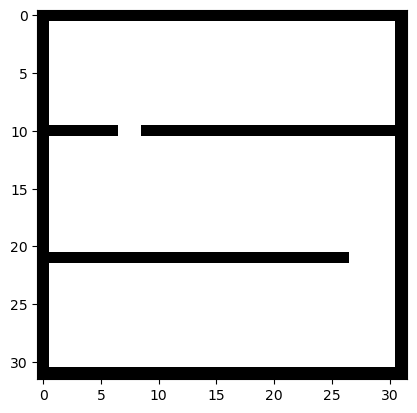

In [5]:

plt.imshow(env.graphics)

c:\Users\mb-92\anaconda3\envs\RLgym\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.open_shortcut to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.open_shortcut` for environment variables or `env.get_wrapper_attr('open_shortcut')` that will search the reminding wrappers.
  logger.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[255., 255., 255.,   1.],
       [255., 255., 255.,   1.]])

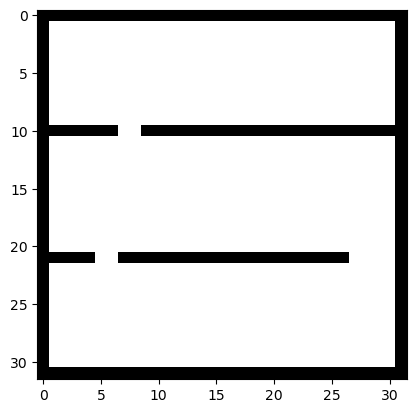

In [6]:
env.open_shortcut()
plt.imshow(env.graphics)
env.graphics[21,5:7,:]

c:\Users\mb-92\anaconda3\envs\RLgym\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.close_shortcut to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.close_shortcut` for environment variables or `env.get_wrapper_attr('close_shortcut')` that will search the reminding wrappers.
  logger.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0., 0., 0., 1.],
       [0., 0., 0., 1.]])

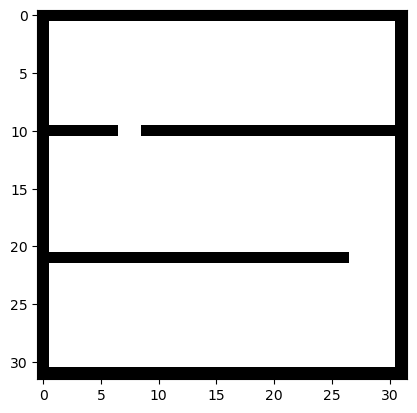

In [7]:
env.close_shortcut()
plt.imshow(env.graphics)
env.graphics[21,5:7,:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


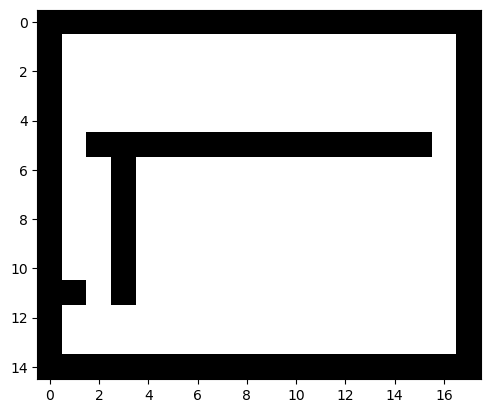

In [12]:
env.open_shortcut()
plt.imshow(env.graphics)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


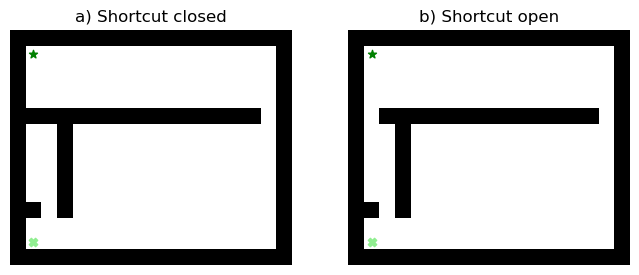

In [17]:
env_closed = gym.make('shortcutshortmaze-v0', render_mode = "rgb_array")
env_open = gym.make('shortcutshortmaze-v0', render_mode = "rgb_array")
env_open.open_shortcut()
fig, axs = plt.subplots(nrows=1,ncols=2,figsize= (8,4))
axs[0].imshow(env_closed.graphics)
axs[0].scatter(1,1, color = "green",marker = "*")
axs[0].scatter(1,13, color = "lightgreen",marker = "X")
axs[1].imshow(env_open.graphics)
axs[1].scatter(1,1, color = "green",marker = "*")
axs[1].scatter(1,13, color = "lightgreen",marker = "X")
axs[0].axis("off")
axs[1].axis("off")
axs[0].set_title("a) Shortcut closed")
axs[1].set_title("b) Shortcut open")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


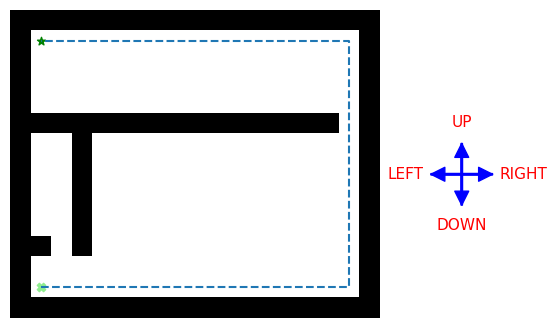

In [3]:
agent =  SarsaAgent(15,18, 4,0.1, 0.2, 1)
        



np.random.seed(0)
n_episodes = 3000
evaluate_policy_after = n_episodes
evaluate_policy_every = 5
experiment_repeats = 30


eps_checks = [3332, 3500,4250,5000]




optimal_lenght_shorcut_closed = 30

open_shorcut_factor = 1.5


agent.reset()
# Create the environment
env = gym.make('shortcutshortmaze-v0', render_mode = "rgb_array")

visited = np.zeros((15,20))
visite_open = np.zeros((15,20))

avg_steps = 0


for episode in range(n_episodes):

    trajectory = []
    done = False
    observation,info= env.reset()

    while not done:
        state = tuple(observation["agent"]["pos"])
        if (episode+1) >= n_episodes//open_shorcut_factor:
            visite_open[state]+=1
        else: 
            visited[state]+=1
        #action = agent.select_action(state)
        action = agent.select_behaviour_action(state)

        observation, reward, done,_, info = env.step(action)
        if done:
            avg_steps+=info["steps"]
        next_state = tuple(observation["agent"]["pos"])
        agent.learn(state,action,reward,next_state)
        trajectory.append( (state,action,reward,next_state))
        state = next_state
    if (episode+1) %100 ==0:
        print(f"episode {episode+1}: trajectory length {info["steps"]:.2f} - average {avg_steps/(episode+1):.2f} ")
 

episode 100: trajectory length 109.00 - average 449.70 
episode 200: trajectory length 95.00 - average 306.16 
episode 300: trajectory length 117.00 - average 240.79 
episode 400: trajectory length 76.00 - average 202.40 
episode 500: trajectory length 48.00 - average 176.36 
episode 600: trajectory length 60.00 - average 158.06 
episode 700: trajectory length 53.00 - average 143.90 
episode 800: trajectory length 56.00 - average 132.97 
episode 900: trajectory length 43.00 - average 124.25 
episode 1000: trajectory length 52.00 - average 117.08 
episode 1100: trajectory length 51.00 - average 110.99 
episode 1200: trajectory length 52.00 - average 106.01 
episode 1300: trajectory length 44.00 - average 101.77 
episode 1400: trajectory length 52.00 - average 97.93 
episode 1500: trajectory length 48.00 - average 94.64 
episode 1600: trajectory length 45.00 - average 91.67 
episode 1700: trajectory length 47.00 - average 89.15 
episode 1800: trajectory length 54.00 - average 86.92 
epis

In [6]:
trajectories = {i: [] for i in range(1000)}
for episode in range(1000):
    done = False
    observation,info= env.reset()
    agent.epsilon = 0.1
    while not done:
        state = tuple(observation["agent"]["pos"])
        if (episode+1) >= n_episodes//open_shorcut_factor:
            visite_open[state]+=1
        else: 
            visited[state]+=1
        #action = agent.select_action(state)
        action = agent.select_action(state)

        observation, reward, done,_, info = env.step(action)
        if done:
            avg_steps+=info["steps"]
        next_state = tuple(observation["agent"]["pos"])
        trajectories[episode].append(next_state)
        state = next_state


done = False
observation,info= env.reset()
agent.epsilon = 0
greedy_trajectory=[]
while not done:
    state = tuple(observation["agent"]["pos"])
    if (episode+1) >= n_episodes//open_shorcut_factor:
        visite_open[state]+=1
    else: 
        visited[state]+=1
    #action = agent.select_action(state)
    action = agent.select_action(state)

    observation, reward, done,_, info = env.step(action)
    if done:
        avg_steps+=info["steps"]
    next_state = tuple(observation["agent"]["pos"])
    greedy_trajectory.append(next_state)
    state = next_state

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


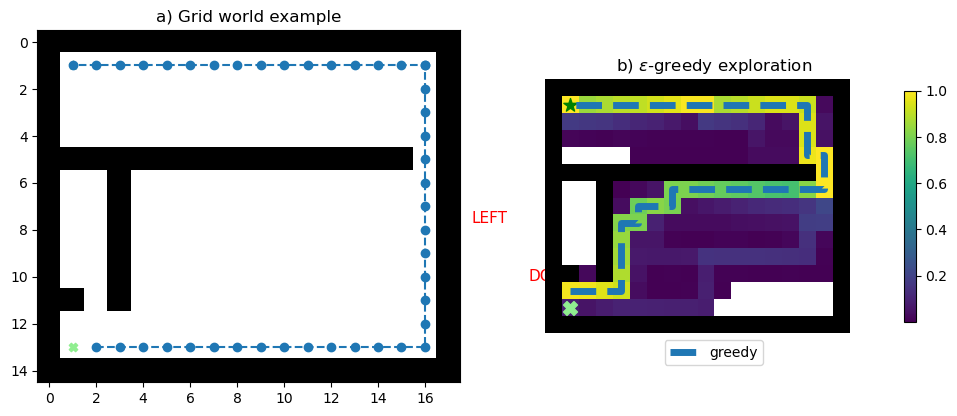

In [31]:
visited = np.zeros((15,20))
cmap = plt.cm.viridis 
cmap.set_bad(color='white')


env_closed = gym.make('shortcutshortmaze-v0', render_mode = "rgb_array")
env_open = gym.make('shortcutshortmaze-v0', render_mode = "rgb_array")
env_open.open_shortcut()
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize= (12,6))
ax1.imshow(env_closed.graphics)
ax1.scatter(1,1, color = "green",marker = "*")
ax1.scatter(1,13, color = "lightgreen",marker = "X")
# ax1.axis("off")
# ax1.set_xlim((-.5,25))


# Add direction arrows
arrow_props = dict(facecolor='blue', edgecolor='blue', width=1, headwidth=10, headlength=10)

ax1.annotate('', xy=(21.5, 6), xytext=(21.5, 9), arrowprops=arrow_props)
ax1.annotate('', xy=(21.5, 9), xytext=(21.5, 6), arrowprops=arrow_props)
ax1.annotate('', xy=(20, 7.5), xytext=(23, 7.5), arrowprops=arrow_props)
ax1.annotate('', xy=(23, 7.5), xytext=(20, 7.5), arrowprops=arrow_props)

ax1.text(18.75, 7.5, 'LEFT', color='red', fontsize=11, ha='center', va='center')
ax1.text(24.5, 7.5, 'RIGHT', color='red', fontsize=11, ha='center', va='center')
ax1.text(21.5, 5, 'UP', color='red', fontsize=11, ha='center', va='center')
ax1.text(21.5, 10, 'DOWN', color='red', fontsize=11, ha='center', va='center')

xline = [i for i in range(2,17)]
yline = [13]*len(xline)
up = [i for i in range(12,0,-1)]
yline += up
xline += [16]*len(up)
left = [i for i in range(16,0,-1)]
xline += left
yline += [1]*len(left)

ax1.plot(xline, yline, "--o")






for episode in range(1000):
    x = np.array([pos[1] for pos in trajectories[episode]])
    y = np.array([pos[0] for pos in trajectories[episode]])
    visited[y,x]+=1
    # plt.scatter(x,y)
mask = visited == 0
visited[mask] = np.inf
masked_visited= np.ma.masked_invalid(visited)

x = np.array([pos[1] for pos in greedy_trajectory])
y = np.array([pos[0] for pos in greedy_trajectory])

img=ax2.imshow(masked_visited/1000,cmap=cmap)
ax2.plot(x,y,"--",linewidth = 5, label = "greedy")
ax2.imshow(env_closed.graphics)
ax2.scatter(1,1, color = "green",marker = "*",s = 100)
ax2.scatter(1,13, color = "lightgreen",marker = "X",s = 100)
fig.colorbar(img, ax=ax2, orientation='vertical', shrink=0.5)
ax2.axis("off")
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 0))
ax2.set_title(r"b) $\epsilon$-greedy exploration")
ax1.set_title("a) Grid world example")
plt.show()